In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np

class SplineShape:
    def __init__(self, num_knots, min_knots=3, max_knots=np.inf):
        if not min_knots <= num_knots <= max_knots or num_knots % 2 == 0:
            raise ValueError(f"Invalid number of knots: {num_knots}")
        self.min_knots = min_knots
        self.max_knots = max_knots
        self.num_knots = num_knots
        self.base_shape = self._base_shape()
    
    def _base_shape(self):
        """
        Returns a base spline shape
        """
        raise NotImplementedError()

    
    def shape(self, density, min_height):
        return self.base_shape * (density - min_height) + min_height
    

class ExponentialShape(SplineShape):
    def __init__(self, num_knots, exp_base):
        """
        A spline bump where y[n] = exp_base^n - 1 + min_height
        """
        self.exp_base = exp_base
        super().__init__(num_knots)

    def _base_shape(self):
        n = self.num_knots // 2
        s = torch.pow(self.exp_base, torch.arange(0, n+1)) - 1
        s = s / self._normalizer()
        return torch.cat([s, torch.flip(s[:-1], [0])], 0)
        
    def _normalizer(self):
        a = self.exp_base
        k = self.num_knots // 2
        n = (a**(1 + k) + k - a * (1 + k))/(a*k - k) - (a**k-1)/(2 * k)
        return n
        
def get_area(k, y):
    # To test if spline is normalized.
    area = 0
    for i in range(len(k)-1):
        area += (k[i+1] - k[i]) * (y[i] + y[i+1]) / 2
    return area

tensor(1.0000)


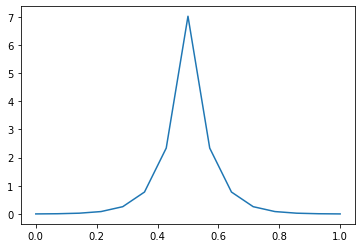

In [2]:
b = 3
n = 15
shape = ExponentialShape(n, b)
base_shape = shape.base_shape
x = torch.arange(0, n).float() / (n-1)
ar = get_area(x, base_shape)
print(ar)
plt.plot(x, base_shape)
plt.show()

tensor([0.0100, 0.0151, 0.0303, 0.0760, 0.2130, 0.6242, 1.8576, 5.5578, 1.8576,
        0.6242, 0.2130, 0.0760, 0.0303, 0.0151, 0.0100]) tensor(0.8000)


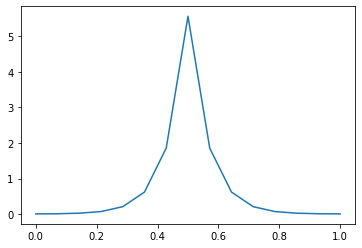

In [3]:
s = shape.shape(0.8, 0.01)
print(s, get_area(x, s))
plt.plot(x, s)

In [4]:
rmin = 0.0001
r = torch.softmax(torch.randn(10), -1)
print(sum(r), min(r), max(r))

a = rmin / (1 - len(r) * rmin)
r = (r + a) / (1 + len(r) * a)
print(sum(r), min(r), max(r))

tensor(1.) tensor(0.0175) tensor(0.1467)
tensor(1.) tensor(0.0176) tensor(0.1466)


In [2]:
import sys
import math
sys.path.append('./..')
from piecewise_linear import PMFPWL
plt.style.use('seaborn')

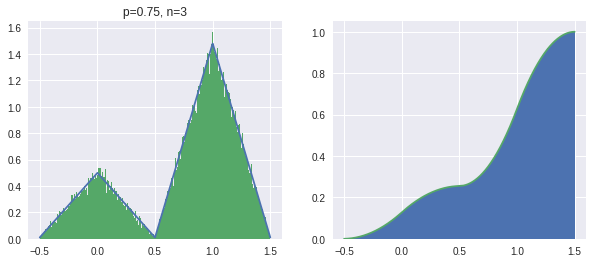

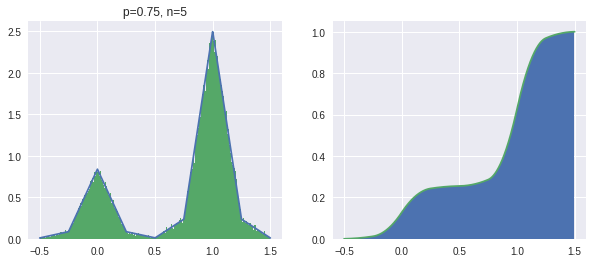

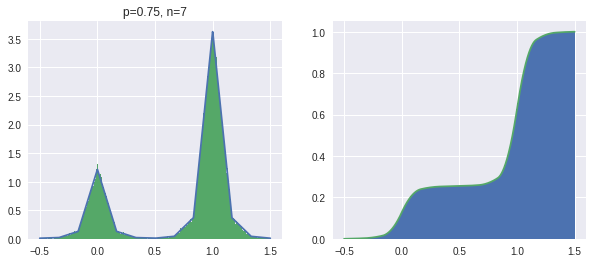

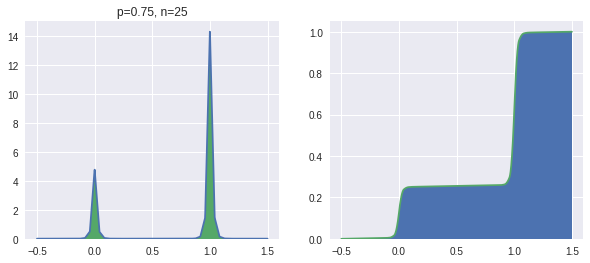

In [63]:
b = 10
p = 0.75
n = 3
x = torch.Tensor([[0, 1]])
y = torch.Tensor([[1-p, p]])
dist = PMFPWL(x, y, 0, 1, h_d=0.01, s=b, num_knots=n)
lx = torch.linspace(-0.5, 1.5, 1000).view(1, 1, -1)
sample = dist.sample(torch.Size([100000]))
plt.figure(figsize=[10, 4])
plt.subplot(1, 2, 1)
plt.title(f'p={p}, n={n}')
plt.plot(lx.squeeze(), dist.pdf(lx).squeeze())
plt.hist(sample.squeeze(), bins=500, density=True)
plt.subplot(1, 2, 2)
plt.hist(sample.squeeze(), bins=500, density=True, cumulative=True)
plt.plot(lx.squeeze(), dist.cdf(lx).squeeze())
plt.show()

p = 0.75
n = 5
x = torch.Tensor([[0, 1]])
y = torch.Tensor([[1-p, p]])
dist = PMFPWL(x, y, 0, 1, h_d=0.01, s=b, num_knots=n)
lx = torch.linspace(-0.5, 1.5, 1000).view(1, 1, -1)
sample = dist.sample(torch.Size([100000]))
plt.figure(figsize=[10, 4])
plt.subplot(1, 2, 1)
plt.title(f'p={p}, n={n}')
plt.plot(lx.squeeze(), dist.pdf(lx).squeeze())
plt.hist(sample.squeeze(), bins=500, density=True)
plt.subplot(1, 2, 2)
plt.hist(sample.squeeze(), bins=500, density=True, cumulative=True)
plt.plot(lx.squeeze(), dist.cdf(lx).squeeze())
plt.show()

p = 0.75
n = 7
x = torch.Tensor([[0, 1]])
y = torch.Tensor([[1-p, p]])
dist = PMFPWL(x, y, 0, 1, h_d=0.01, s=b, num_knots=n)
lx = torch.linspace(-0.5, 1.5, 1000).view(1, 1, -1)
sample = dist.sample(torch.Size([100000]))
plt.figure(figsize=[10, 4])
plt.subplot(1, 2, 1)
plt.title(f'p={p}, n={n}')
plt.plot(lx.squeeze(), dist.pdf(lx).squeeze())
plt.hist(sample.squeeze(), bins=500, density=True)
plt.subplot(1, 2, 2)
plt.hist(sample.squeeze(), bins=500, density=True, cumulative=True)
plt.plot(lx.squeeze(), dist.cdf(lx).squeeze())
plt.show()

p = 0.75
n = 25
x = torch.Tensor([[0, 1]])
y = torch.Tensor([[1-p, p]])
dist = PMFPWL(x, y, 0, 1, h_d=0.01, s=b, num_knots=n)
lx = torch.linspace(-0.5, 1.5, 1000).view(1, 1, -1)
sample = dist.sample(torch.Size([100000]))
plt.figure(figsize=[10, 4])
plt.subplot(1, 2, 1)
plt.title(f'p={p}, n={n}')
plt.plot(lx.squeeze(), dist.pdf(lx).squeeze())
plt.hist(sample.squeeze(), bins=500, density=True)
plt.subplot(1, 2, 2)
plt.hist(sample.squeeze(), bins=500, density=True, cumulative=True)
plt.plot(lx.squeeze(), dist.cdf(lx).squeeze())
plt.show()

In [27]:
p = 0.75
n = 25
x = torch.Tensor([[0, 1]])
y = torch.Tensor([[1-p, p]])
dist = PMFPWL(x, y, 0, 1, h_d=0.01, s=4, num_knots=n)

TypeError: __init__() got an unexpected keyword argument 's'

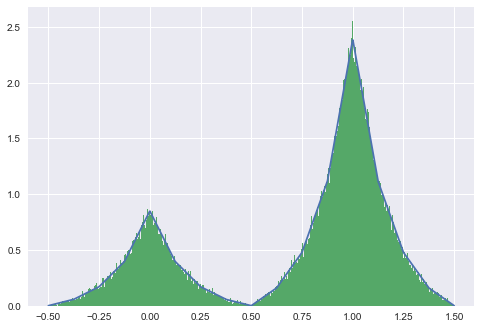

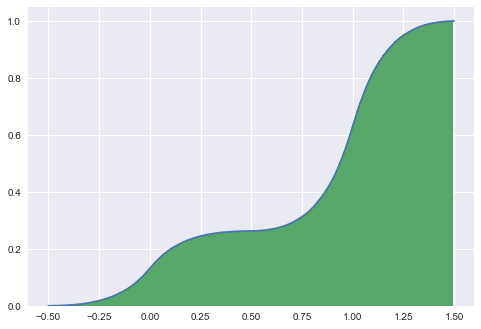

tensor(0.7377, grad_fn=<SelectBackward>)


In [18]:
import torch
p = torch.rand(4, 5)
p.requires_grad = True
from piecewise_linear import BinaryPWL2

dist = BinaryPWL2(p, 0.001, 2, 9)
lx = torch.linspace(-0.5, 1.5, 1000).view(1, 1, -1)
lx = lx.expand(4, 5, -1)
sample = dist.sample(torch.Size([100000]))
pdf = dist.pdf(lx)
cdf = dist.cdf(lx)
plt.plot(lx[0, 0], pdf[0, 0].detach())
plt.hist(sample[0, 0], density=True, bins=500)
plt.show()
plt.plot(lx[0, 0], cdf[0, 0].detach())
plt.hist(sample[0, 0], density=True, bins=500, cumulative=True)
plt.show()
print(p[0, 0])

In [35]:
dist.entropy().mean().backward()
p.grad

tensor([[-0.2841, -0.0071, -0.0678,  0.1391, -0.0713],
        [-0.0221, -0.0035,  0.0672,  0.0861,  0.1104],
        [-0.0608,  0.0853,  0.0443,  0.0177, -0.0146],
        [-0.0366, -0.0083,  0.0633,  0.1130,  0.0739]])